# Ensemble correlation concept using OpenPIV

Ensemble correlation should work in places where the flow is really steady and repeatable 
or could be phase averaged in the sense that the correlation map in a single interrogation 
window represents displacements from a statistically stationary distribution. 

In such case, the noisy position of the correlation peak is due to randomness that can 
be averaged out like the white noise and the avergaging of the correlation maps will 
yield a high quality peak that has great signal to noise ratio and close to Gaussian

In this case the velocity estimate in the interrogation window will approach the mean
velocity value at that location. 

In [1]:
from openpiv.pyprocess import *
from openpiv.tools import *

In [2]:
from glob import glob

In [3]:
from pylab import *

In [4]:
imlist = glob('../test12/*.tif')
imlist.sort()
print(imlist)

['../test12/A001a.tif', '../test12/A001b.tif', '../test12/A002a.tif', '../test12/A002b.tif', '../test12/A003a.tif', '../test12/A003b.tif', '../test12/A004a.tif', '../test12/A004b.tif', '../test12/A005a.tif', '../test12/A005b.tif']


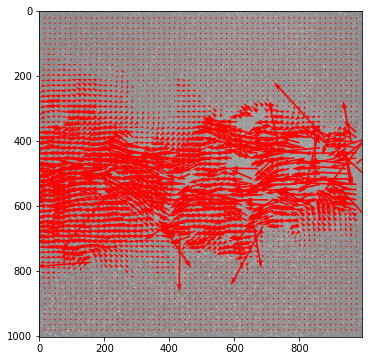

In [5]:
# just a quick look at the data
from openpiv.piv import simple_piv
simple_piv(imlist[0], imlist[1]);

## Ensemble averaged correlation using FFT based correlation from OpenPIV

In [6]:
corrs = []
for i,j in zip(imlist[::2],imlist[1::2]):
    # print(i,j)
    corrs.append(fft_correlate_images(moving_window_array(imread(i),64,32),
                                        moving_window_array(imread(j),64,32),
                                        normalized_correlation=True))

In [7]:
corrs = np.array(corrs)  # save also single image pair correlations
mean_correlation = corrs.mean(axis=0)  # ensemble average

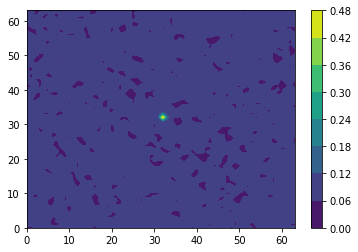

In [8]:
# Let's compare the result with instantaneous results
contourf(mean_correlation[23,:,:])
colorbar()

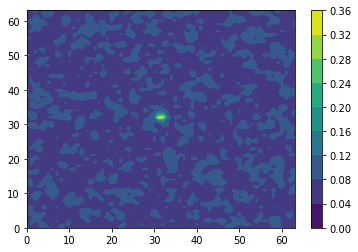

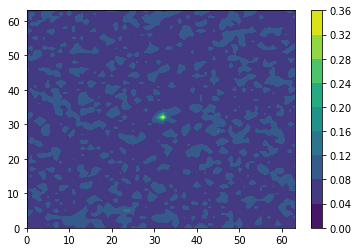

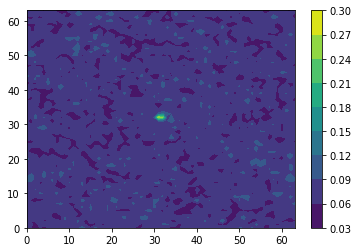

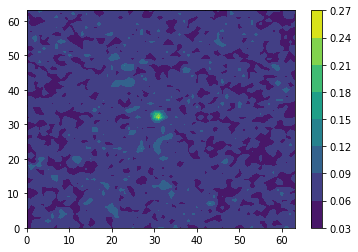

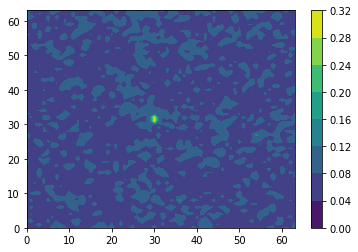

In [9]:
for i in range(corrs.shape[0]):
    figure()
    contourf(corrs[i,252,:,:])
    colorbar()

In [10]:
im = imread(imlist[0])
im.shape

(1004, 992)

In [11]:
grid = get_field_shape(im.shape,search_area_size=64,overlap=32)
nrows, ncols = grid[0], grid[1]

In [12]:
u,v = correlation_to_displacement(mean_correlation, nrows, ncols)

In [13]:
x,y = get_coordinates(im.shape, 64, 32)

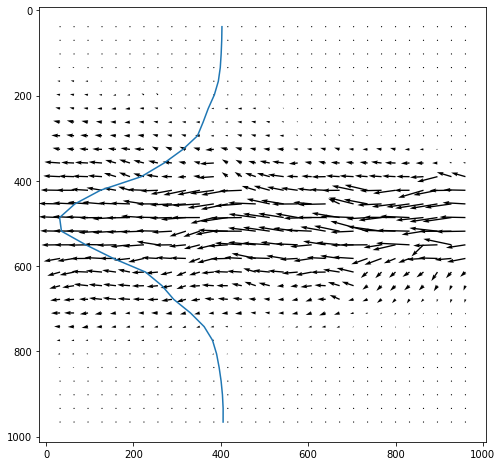

In [14]:
fig, ax = subplots(figsize=(8,8))
ax.quiver(x,y,u,v,scale=80,width=.003)
ax.invert_yaxis()
plot(u.mean(axis=1)*80+400,y[:,0])

In [15]:
# another way is the averaging of velocity fields

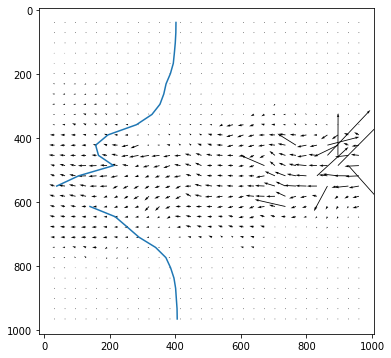

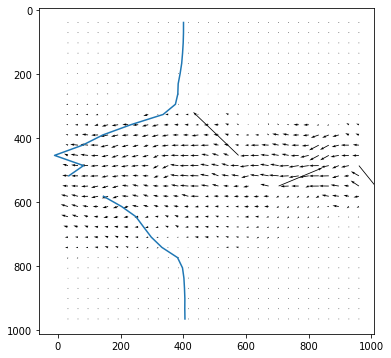

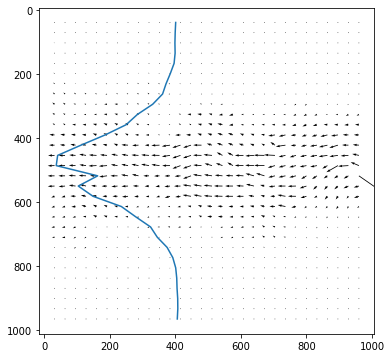

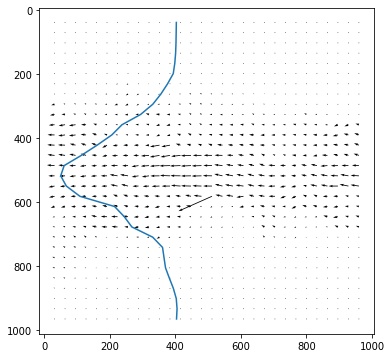

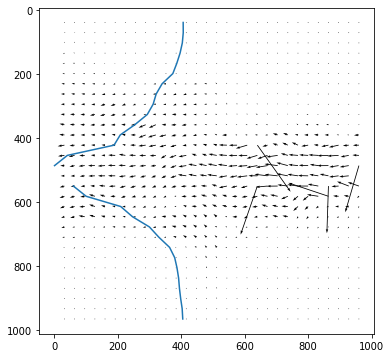

In [16]:
U = []
V = []

for i in range(corrs.shape[0]):
    tmpu,tmpv = correlation_to_displacement(corrs[i,:,:,:], nrows, ncols)
    U.append(tmpu)
    V.append(tmpv)
    fig, ax = subplots(figsize=(6,6))
    ax.quiver(x,y,tmpu,tmpv,scale=200)
    ax.invert_yaxis()
    plot(tmpu.mean(axis=1)*80+400,y[:,0])
    
    
U = np.array(U)
V = np.array(V)

meanU = np.mean(U, axis=0)
meanV = np.mean(V, axis=0)

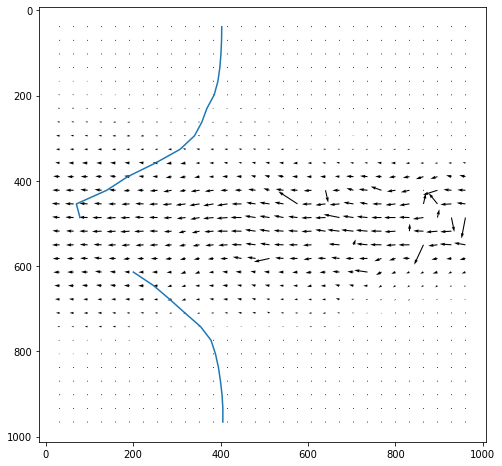

In [17]:
fig, ax = subplots(figsize=(8,8))
ax.quiver(x,y,meanU,meanV,scale=200)
ax.invert_yaxis()
plot(meanU.mean(axis=1)*80+400,y[:,0])